In [2]:
from utils import one_hot_encoding, show_batch, Dataset
from model import LeNet5
from train import train
import numpy as np

In [26]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)
y_train = one_hot_encoding(y_train)
y_test = one_hot_encoding(y_test)

print("y_train.shape",y_train.shape)
print("x_train.shape",x_train.shape)
print("y_test.shape",y_test.shape)
print("x_test.shape",x_test.shape)

y_train.shape (60000, 10)
x_train.shape (60000, 1, 28, 28)
y_test.shape (10000, 10)
x_test.shape (10000, 1, 28, 28)


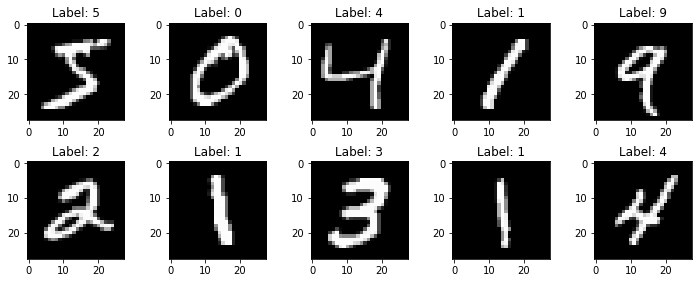

In [27]:
show_batch(x_train, y_train)

In [28]:
from layers import CrossEntropyLoss
from optimizers import Adam

BATCH_SIZE = 64
EPOCHS = 4

model = LeNet5()
loss = CrossEntropyLoss()

optimizer = Adam(
    lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, params=model.get_params()
)

dataset = Dataset(x_train, y_train, x_test, y_test)
history = train(model, dataset, loss, optimizer, BATCH_SIZE, EPOCHS)

  0%|          | 0/937 [00:00<?, ?it/s]/Users/danilsaharov/Documents/ml/NNArchitectures/3_CNN/layers.py:165: RuntimeWarning: overflow encountered in exp
  self.out = 1 / (1 + np.exp(-X))
[Train] Epoch 1: 100%|██████████| 937/937 [02:40<00:00,  5.84it/s]


train-loss: 23.544453 | train-acc: 0.893
Elapsed time for epoch 1: 2.6725217659666667 min.


[Val] Epoch 1: 100%|██████████| 156/156 [00:04<00:00, 31.25it/s]


val-loss: 9.193274 | val-acc: 0.954


[Train] Epoch 2: 100%|██████████| 937/937 [02:57<00:00,  5.29it/s]


train-loss: 8.040109 | train-acc: 0.961
Elapsed time for epoch 2: 2.950620970833332 min.


[Val] Epoch 2: 100%|██████████| 156/156 [00:05<00:00, 30.91it/s]


val-loss: 5.760350 | val-acc: 0.969


[Train] Epoch 3: 100%|██████████| 937/937 [03:25<00:00,  4.55it/s]  


train-loss: 6.038271 | train-acc: 0.971
Elapsed time for epoch 3: 2.978918146516668 min.


[Val] Epoch 3: 100%|██████████| 156/156 [00:04<00:00, 34.24it/s]


val-loss: 4.540552 | val-acc: 0.976


[Train] Epoch 4: 100%|██████████| 937/937 [03:13<00:00,  4.85it/s]


train-loss: 4.984060 | train-acc: 0.976
Elapsed time for epoch 4: 3.219632454866667 min.


[Val] Epoch 4: 100%|██████████| 156/156 [00:05<00:00, 28.30it/s]

val-loss: 4.127670 | val-acc: 0.977


Evaluation: 100%|██████████| 625/625 [00:24<00:00, 25.08it/s]


test-loss: 1.032003 | test-acc: 0.979


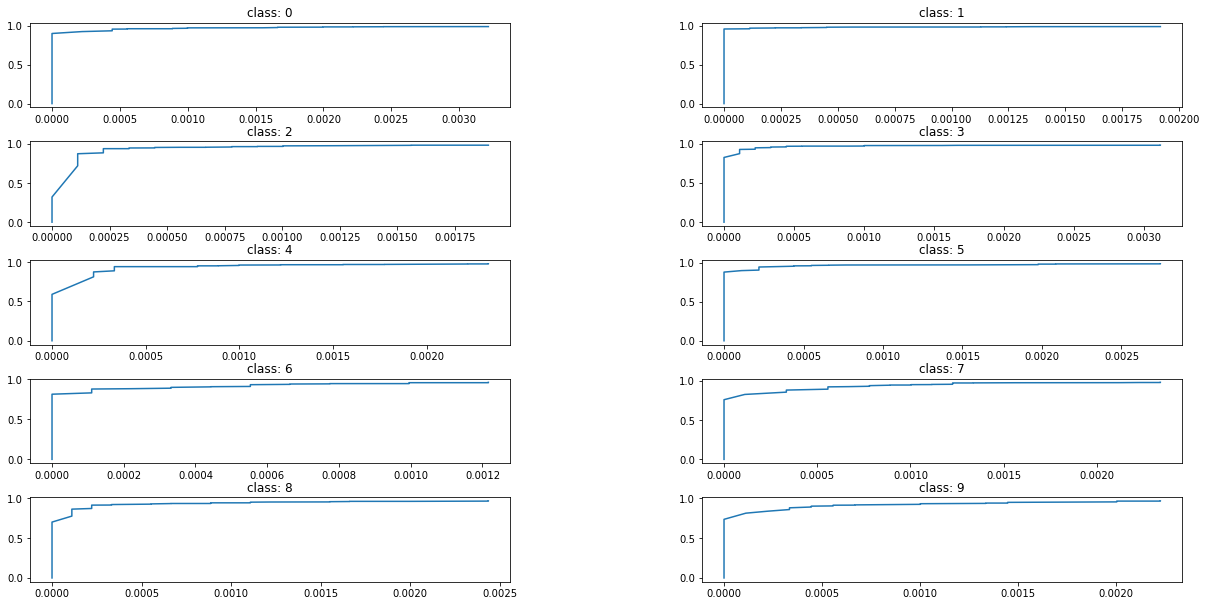

In [33]:
from metrics import Metrics
Test = Metrics(x_test, y_test)

Test.test(model, loss)
Test.ROC_AUC()